# Boosting the Octave `hilb` function

Today, I read an interesting
[article about Hilbert Matrices in N. Higham's blog](https://nhigham.com/2020/06/30/what-is-the-hilbert-matrix)
and stumbled over these simple elegant two lines:

In [1]:
function H = hilb_higham (n)
  j = 1:n;
  H = 1 ./ (j' + j - 1);
endfunction

I checked with the implementation of Octave.
The currently implemented approach is not as elegant as it can be
and includes a for-loop:

In [2]:
function H = hilb_octave (n)
  H = zeros (n);
  tmp = 1:n;
  for i = 1:n
    H(i, :) = 1.0 ./ tmp;
    tmp += 1;
  endfor
endfunction

> **Fun fact:** The "MATLAB implicit expansion feature" mentioned in Higham's
> article was introduced in
> [Matlab R2016b](https://nhigham.com/2016/09/20/implicit-expansion-matlab-r2016b/).
> This feature is called
> [broadcasting](https://octave.org/doc/v5.2.0/Broadcasting.html)
> and was
> [introduced in Octave 3.6.0 back in 2012](https://wiki.octave.org/Release_History#3.x_series).

Comparing the implementations clearly shows,
that Higham's solution should be taken.

In the figure generated by the test code below, **smaller** values are better.

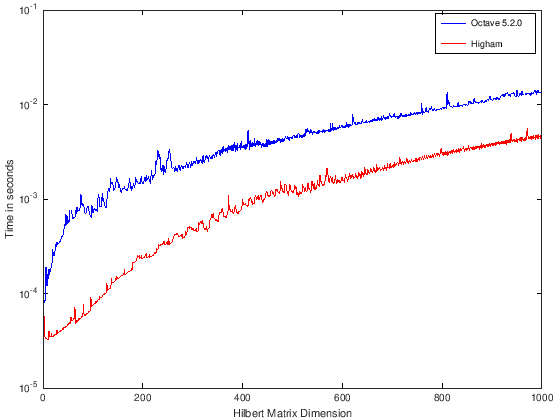

In [3]:
N = 1000;
time_octave_hilb = zeros (1, N);
time_higham_hilb = zeros (1, N);

for i = 1:N
  tic;
  hilb_octave (i);
  time_octave_hilb(i) = toc;
endfor

for i = 1:N
  tic;
  hilb_higham (i);
  time_higham_hilb(i) = toc;
endfor

semilogy (1:N, time_octave_hilb, 'b');
hold on;
semilogy (1:N, time_higham_hilb, 'r');
legend ({"Octave 5.2.0", "Higham"});
xlabel ("Hilbert Matrix Dimension");
ylabel ("Time in seconds");

Octave uses Higham's approach since [cset 627da618dcc4](https://hg.savannah.gnu.org/hgweb/octave/rev/627da618dcc4).

> July 01, 2020 (Version 1)
>
> Download the [Jupyter Notebook](https://siko1056.github.io/assets/jupyter/2020-07-01-octave-hilb-function.ipynb).